<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°031



## Problema 01


<img src="https://cdn-icons-png.flaticon.com/512/11651/11651343.png" width="480" height="360" align="center"/>


El conjunto de datos `occupation.csv` consiste en información detallada sobre distintos usuarios, abarcando aspectos como edad, género, profesión y ubicación geográfica. Este conjunto de datos proporciona una visión rica sobre la diversidad de ocupaciones y demografía de una población específica.


**Descripción de las Columnas**

El DataFrame contiene las siguientes columnas, cada una representando un aspecto clave de la información del usuario:

- **`user_id`**: Un identificador único para cada usuario.
- **`age`**: La edad del usuario.
- **`gender`**: El género del usuario, indicado como 'M' (masculino) o 'F' (femenino).
- **`occupation`**: La profesión u ocupación del usuario.
- **`zip_code`**: El código postal del área de residencia del usuario, que puede ser útil para análisis geográficos.

Este conjunto de datos permite realizar una variedad de análisis estadísticos y descriptivos, desde demográficos básicos hasta exploraciones más complejas de las relaciones entre ocupación, edad y ubicación.


In [1]:
import pandas as pd

# load data
url='https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/ocupation.csv'

df = pd.read_csv(url, sep="|" )
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

### Descripción General
- **Total de Observaciones**: ¿Cuántas filas tiene el conjunto de datos?
- **Total de Columnas**: ¿Cuántas columnas tiene el conjunto de datos?
- **Nombres de Columnas**: Listar todos los nombres de las columnas.
- **Índice del DataFrame**: Describir cómo está indexado el DataFrame.
- **Tipos de Datos**: Detallar los tipos de datos de cada columna.


In [4]:
#Total de Observaciones
print("Total de Observaciones: ", df.shape[0])
#Total de Columnas
print("Total de Columnas: ", df.shape[1])
#Nombres de Columnas
for i in range(df.shape[1]):
  print("Nombre de la Columna ", i+1, ": ", df.columns[i])
#Índice del DataFrame
print("Índice del DataFrame: ", df.index)
#Tipos de Datos
print("Tipos de Datos: \n", df.dtypes)

Total de Observaciones:  943
Total de Columnas:  5
Nombre de la Columna  1 :  user_id
Nombre de la Columna  2 :  age
Nombre de la Columna  3 :  gender
Nombre de la Columna  4 :  occupation
Nombre de la Columna  5 :  zip_code
Índice del DataFrame:  RangeIndex(start=0, stop=943, step=1)
Tipos de Datos: 
 user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object



### Estadísticas Descriptivas
- **Resumen Estadístico**: Utilizar .describe() para obtener un resumen estadístico de las columnas pertinentes.
- **Columna de Ocupación**: Visualizar los datos de la columna occupation.


In [11]:
#Resumen Estadistico
df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [12]:
#Columna de Ocupacion
df['occupation'].value_counts()

,count
occupation,
student,196
other,105
educator,95
administrator,79
engineer,67
programmer,66
librarian,51
writer,45
executive,32



### Análisis de Ocupaciones
- **Cantidad de Ocupaciones Únicas**: ¿Cuántas ocupaciones diferentes existen en el conjunto de datos?
- **Ocupación Más Frecuente**: ¿Cuál es la ocupación que aparece con mayor frecuencia?
- **Distribución de Ocupaciones**: Mostrar la distribución de las 10 ocupaciones más comunes con un gráfico de barras.


Cantidad de Ocupaciones Unicas:  21
Ocupacion Mas Frecuente:  student


<Axes: xlabel='occupation'>

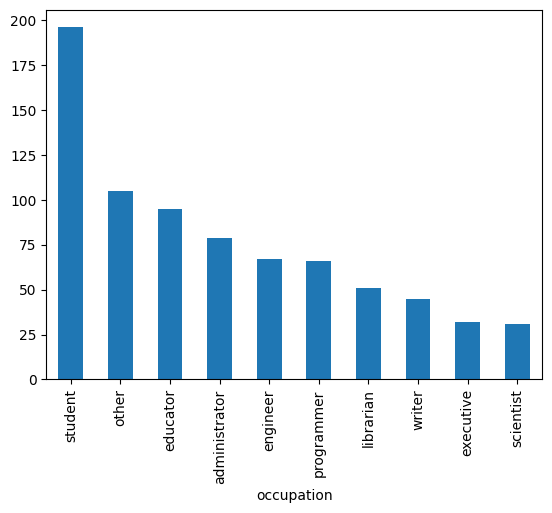

In [14]:
#Cantidad de Ocupaciones Unicas
print("Cantidad de Ocupaciones Unicas: ", df['occupation'].nunique())
#Ocupacion Mas Frecuente
print("Ocupacion Mas Frecuente: ", df['occupation'].value_counts().idxmax())
#Distribucion de Ocupaciones
df['occupation'].value_counts().head(10).plot(kind='bar')


### Análisis Demográfico
- **Edad Media de los Usuarios**: Calcular la edad promedio.
- **Edad con Menos Ocurrencia**: Identificar las edades menos comunes.
- **Distribución de la Edad de los Usuarios**: Identificar la distribución de edades.
- **Proporción de Géneros**: Calcular la proporción de usuarios por género.


In [19]:
#Edad Media de los Usuarios
print("Edad Media de los Usuarios: ", df['age'].mean())
#Edades con Menos Ocurrencia
print("Edades con Menos Ocurrencia: ")
for edad, frecuencia in df['age'].value_counts().items():
  if frecuencia == 1:
    print(edad)

Edad Media de los Usuarios:  34.05196182396607
Edades con Menos Ocurrencia: 
7
66
11
10
73


age_group
(0, 10]       2
(10, 20]    107
(20, 30]    339
(30, 40]    223
(40, 50]    167
(50, 60]     83
(60, 70]     21
(70, 80]      1
Name: count, dtype: int64


<Axes: xlabel='age_group'>

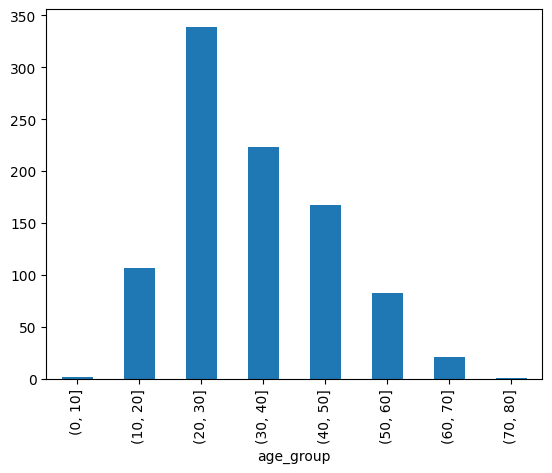

In [24]:
# Define los intervalos de edad
rango = range(0, df['age'].max() + 10, 10)

# Crea una nueva columna con los intervalos de edad
df['age_group'] = pd.cut(df['age'], bins=rango)

# Calcula la tabla de distribución de edades
tabla_distribucion = df['age_group'].value_counts().sort_index()

# Muestra la tabla
print(tabla_distribucion)

# Gráfica de la distribución de edades en intervalos de 10 años
tabla_distribucion.plot(kind='bar')

In [25]:
#Proporcion de Usuarios por Genero
df['gender'].value_counts(normalize=True)

,proportion
gender,
M,0.710498
F,0.289502
